# Milestone 4 - Visualizing statistics

---  

# Objective of this notebook
* Compare the performance of the 4 image classification models i.e. 3 different transfer learning algorithms and CNN model from scratch which we built in 2nd and 3rd milestones. 
* Plot and visualize different charts to compare the results which help to determine the best model.

> **Note:** The content of this notebook follows the description provided in [Milestone-4](./Milestone-4.md)

---
## 1. Prerequisites

### Importing packages & modules

In [1]:
# Common modules/packages
import matplotlib.pyplot as plt
import math
import numpy as np
import pathlib
import warnings

# PyTorch modules/packages
import torch

%matplotlib inline
warnings.filterwarnings('ignore')

### Setting up the training mode based on CUDA capability

In [2]:
device = 'cpu'  # sets the default value
train_on_gpu = torch.cuda.is_available()  # returns True if CUDA enabled GPU is available

if train_on_gpu == True :
    print('CUDA is available!  Training on GPU ...')
    print('\n')
    print(torch.cuda.get_device_properties(0))
    device = 'cuda'

CUDA is available!  Training on GPU ...


_CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


### Define some utilities functions

In [3]:
# Retrieves the list of files with a directory
def getFilesInDirectory(pathToDir, extension = "*.*"):
    if not isinstance(pathToDir, pathlib.PurePath):
        pathToDir = pathlib.Path(pathToDir)

    return list(pathToDir.glob(extension))

# Retrieves the list of folders with a directory
def getFoldersInDirectory(pathToDir, prefix = ""):
    if not isinstance(pathToDir, pathlib.PurePath):
        pathToDir = pathlib.Path(pathToDir)

    return sorted([fld for fld in pathToDir.iterdir() if fld.is_dir() and not fld.name.lower().startswith(prefix)])

# Retrieves the list of folders with a directory
def getFolderNamesInDirectory(pathToDir, prefix = ""):
    if not isinstance(pathToDir, pathlib.PurePath):
        pathToDir = pathlib.Path(pathToDir)

    return sorted([fld.name for fld in pathToDir.iterdir() if fld.is_dir() and not fld.name.lower().startswith(prefix)])

### List the categories

In [4]:
# sets the root folder for image sets
pathToDataset = pathlib.Path.cwd().joinpath('..', 'dataset')
pathToTrain = pathToDataset.joinpath('train')

# Count and list art category
artCategories = getFolderNamesInDirectory(pathToTrain, ".")  #collects the list of folders
print("Total no. of categories = ", len(artCategories))  #displays the number of classes (= Art categories)
print("Categories: ", artCategories)  #displays the list of classes

Total no. of categories =  4
Categories:  ['genre', 'landscape', 'portrait', 'still-life']


## Preparing the metrics

* Retrieve for each model previously saved the performance metrics saved during the previous milestones. These metrics were saved as **checkpoint**

In [5]:
# Defining checkpoints
checkpoints = []
model_names = []

# For each files within the model folder
files = getFilesInDirectory(pathlib.Path.cwd().joinpath('..', 'models'), '*.pt')    #lists all the 'jpg' images in the folder
for file in files:
    # Extracting the model name
    model_names.append(file.name[8:len(file.name)-3])
    # Add to checkpoint library
    if train_on_gpu == True :
        checkpoints.append( torch.load(file) )
    else:
        checkpoints.append( torch.load(file, map_location=torch.device('cpu')) )

print( "{} models found !".format(len(model_names)) )

4 models found !


* For each checkpoints, display the metrics. The metrics should be the same for all the models.

In [6]:
#Contents of checkpoint files
for checkpoint in checkpoints:
    for metric in checkpoint:
        print(metric)
#-------------------------------------------------------------------------#
#------  Make sure that the statistics are the same for each model  ------#
#-------------------------------------------------------------------------#

training_losses
valid_losses
accuracies
classes_accuracies
state_dict
training_losses
valid_losses
accuracies
classes_accuracies
state_dict
training_losses
valid_losses
accuracies
classes_accuracies
state_dict
training_losses
valid_losses
accuracies
classes_accuracies
state_dict


## Collect  the performance metrics

The following metrics were previously saved within a checkpoint:
* Training loss over each epoch
* Validation loss over each epoch
* Accuracy over each epoch
* Class accuracy (testing)
* Number of epochs

These metrics will be represented through several plots. The coordinates in the X axis will be represented by the number of Epoch.

* For all checkpoints, create a list for each metrics
* Determine the maximum of all Epoch numbers (across all checkpoints)
* Create an integer range between 1 and the maximum adn convert it into a list. This list represents the X axis coordinates.

In [7]:
# Number of epochs to consider
max_numEpoch = 40

# Collecting statistics
accuracies = []
classes_accuracies = []
num_epochs = []
training_losses = []
valid_losses = []

# Going through the collection of checkpoints
for checkpoint in checkpoints:
    training_losses.append( checkpoint.get('training_losses')[:max_numEpoch] )
    valid_losses.append( checkpoint.get('valid_losses')[:max_numEpoch] )
    accuracies.append( checkpoint.get('accuracies')[:max_numEpoch] )
    classes_accuracies.append(checkpoint.get('classes_accuracies')[:len(artCategories)] )
    num_epochs.append( len( checkpoint.get('training_losses') ) )

epochs = list(range(1, max_numEpoch + 1, 1))
#----------------------------------------------------------------------------------------------------------------------#
#------  Note that `state_dict` is the trained model and is of no use while plotting and visualizing statistics  ------#
#----------------------------------------------------------------------------------------------------------------------#

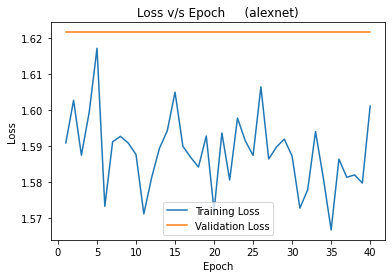

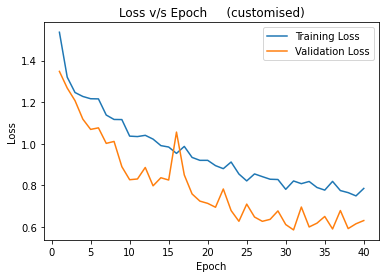

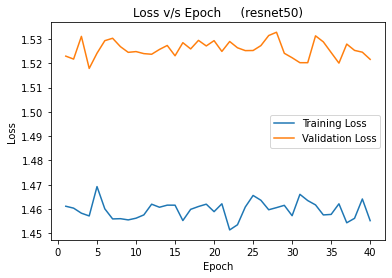

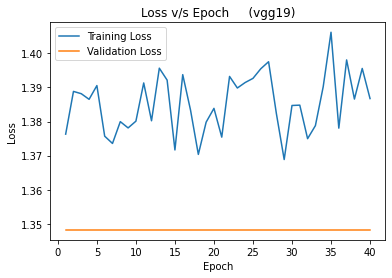

In [8]:
# Going through the collection of checkpoints
for i in range(len(model_names)):
    x = epochs
    y = training_losses[i]
    z = valid_losses[i]
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss v/s Epoch' + '     (' + model_names[i] + ')')
    plt.plot(x, y, label = 'Training Loss')
    plt.plot(x, z, label = 'Validation Loss')
    plt.legend()
    plt.show()

### Compare Training Loss for all models
In order to evaluate which model learns best:
* Create one graph for all the models for the train learning curve only.

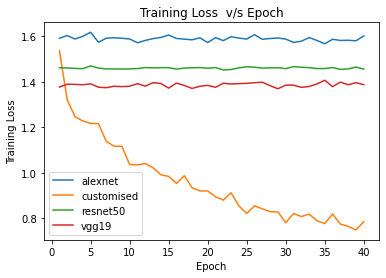

In [9]:
# Setting coordinates
x = epochs
ys = []
for i in range(len(model_names)):
    ys.append(training_losses[i])

# Plotting
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss  v/s Epoch')

for i in range(len(model_names)):
    plt.plot(x,ys[i],label = model_names[i])

plt.legend()
plt.show()

### Compare Validation Loss for all models
In order to evaluate which model generalizes best:
* Create one graph for all the models for the validation learning curve only.

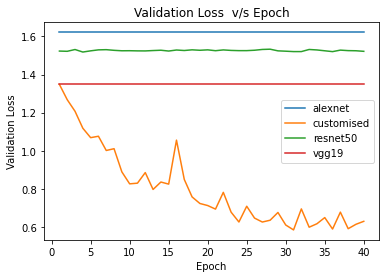

In [10]:
# Setting coordinates
x = epochs
ys = []
for i in range(len(model_names)):
    ys.append(valid_losses[i])

# Plotting
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss  v/s Epoch')

for i in range(len(model_names)):
    plt.plot(x,ys[i],label = model_names[i])

plt.legend()
plt.show()

### Compare Accuracy Loss for all models
In order to evaluate which model performs best:
* Create one graph for all the models for the performance learning curve only.

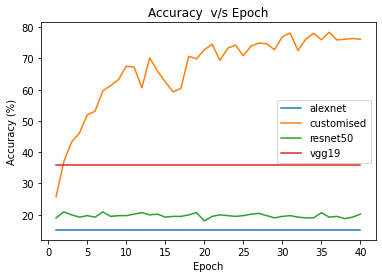

In [11]:
# Setting coordinates
x = epochs
ys = []
for i in range(len(model_names)):
    ys.append(accuracies[i])

# Plotting
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy  v/s Epoch')

for i in range(len(model_names)):
    plt.plot(x,ys[i],label = model_names[i])

plt.legend()
plt.show()

### Compare Accuracy Loss per art category
In order to evaluate which model performs best per category:
* For each model, create one graph for all the categories for the performance learning curve only.

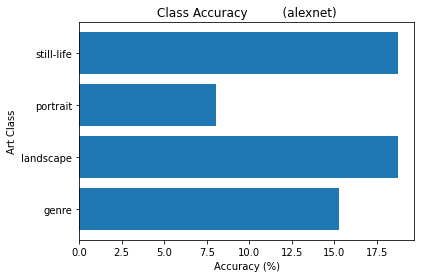

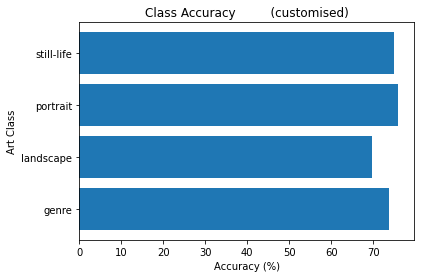

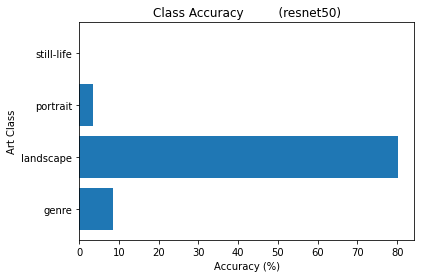

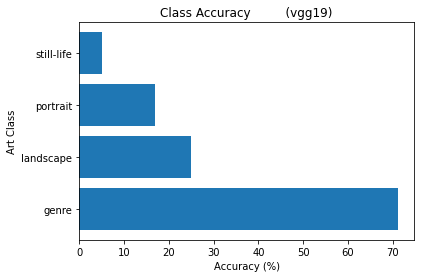

In [13]:
for i in range(len(model_names)):
    plt.barh(artCategories, classes_accuracies[i], align = 'center')
    plt.xlabel('Accuracy (%)')
    plt.ylabel('Art Class')
    plt.title('Class Accuracy' + '         (' + model_names[i] +')')
    plt.show()

---
## Optional - Data visualization
>* Create one graph for all the categories (x-Axis) showing the performance of each model.

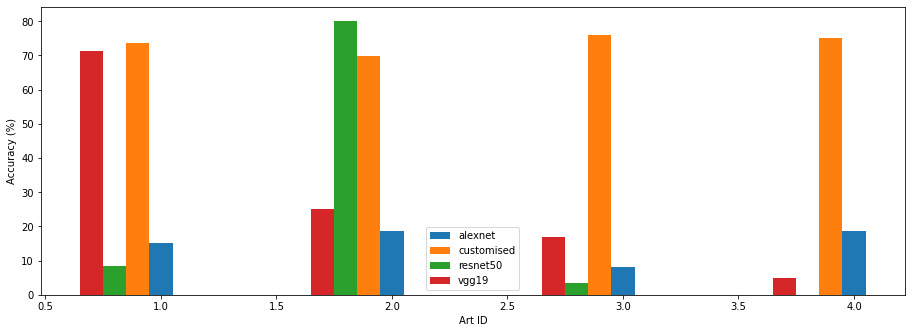

Art Name              | Art ID
----------------------+---------- 
genre                 | 0.600
landscape             | 1.600
portrait              | 2.600
still-life            | 3.600


In [14]:
data = []

for i in range(len(model_names)):
    data.append(classes_accuracies[i])
    
X = np.arange(1,len(artCategories)+1,1)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])

for i in range(len(data)):
    ax.bar(X, data[i], width = 0.1, label = model_names[i])
    X = X - 0.1

#ax.bar(X + 0.30, data[3], color = 'y', width = 0.1, label = model4_name)

plt.xlabel('Art ID') 
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

print ("{:<22}| {:<3}".format('Art Name','Art ID'))
print ("----------------------+---------- ")
for x , y in zip(artCategories , X):
    print ("{:<22}| {:.3f}".format(x,y))